In [4]:
import nltk
nltk.download('popular')
import pandas as pd
import string
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Daffa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Daffa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Daffa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Daffa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Daffa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [2]:
## Load Dataset

In [6]:
df = pd.read_csv("labeled_final_train.csv")
df.head()
# baris label berisi 1 dan 0 menandakan hubungan sentence 1 dan sentence 2 apakah parafrase

,id,sentence1,sentence2,label
0,1,"In Paris , in October 1560 , he secretly met t...","In October 1560 , he secretly met with the Eng...",0
1,2,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...,1
2,3,"There are also specific discussions , public p...","There are also public discussions , profile sp...",0
3,4,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...,1
4,5,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...,1


In [7]:
df['label'].value_counts()

0    27572
1    21829
Name: label, dtype: int64

In [22]:
df.shape

(49401, 4)

In [23]:
# hanya mengambil 200 baris data pada dataset
df200 = df.sample(n=200, random_state=42)

In [25]:
df200.shape

(200, 4)

In [54]:
## Clean txt

In [26]:
def preprocess_text(text):
    # menghilangkan punctuation/tanda baca
    text = text.translate(str.maketrans("", "", string.punctuation))
    # menghilangkan lowercase
    text = text.lower()
    # remove stopwards
    stop_words = set(stopwords.words('english'))
    text = " ".join((word for word in text.split() if word not in stop_words))
    return text

#contoh
preprocess_text("Hello my name is @%$%^$budi")

'hello name budi'

In [27]:
# mengaplikasikan ke dataset
df200['sentence1'] = df200['sentence1'].apply(preprocess_text)
df200['sentence2'] = df200['sentence2'].apply(preprocess_text)

In [28]:
df200.head()

,id,sentence1,sentence2,label
14403,14404,500 hispanic settlers lived near san antonio r...,500 hispanic settlers lived near san antonio r...,1
30768,30769,fuksas born rome 1944 father lithuanian jewish...,born 1944 rome father lithuanian jewish french...,1
15832,15833,bassett owner toronto argonauts 1957 1974 team...,bassett owner canadian football league 1957 19...,0
26264,26265,established republican george allen ran third ...,chuck robb ran incumbent third term lost repub...,0
14061,14062,mukesh venugopal lead singer music band hits o...,venugopal mukesh lead singer music band hits o...,1


In [29]:
df200['label'].value_counts()

0    119
1     81
Name: label, dtype: int64

In [35]:
#membalace data
from sklearn.utils import resample

#mendapatkan nilai max count dari semua categori = 120
max_count = df200['label'].value_counts().max()

#Meresampling setiap kategori ke maximum count yg cocok untuk dataset seimbang
balanced_data = [] # buat empty list
for label in df200['label'].unique(): # mengambil nama setiap category
    label_data = df200[df200['label'] == label] #jika kategori sama masukan ke variable
    if len(label_data) < max_count: 
        # akan melakukan oversampling untuk kategori dengan sampling sedikit atau kurang dari max
        balanced_label_data = resample(label_data, replace=True, n_samples = max_count, random_state=42)
    else:
        # akan melakukan undersampling unutk kategori yg lebih banyak sample
        balanced_label_data = resample(label_data, replace= False, n_samples = max_count, random_state=42)
    balanced_data.append(balanced_label_data)
# Concat untuk hasil balanced data untuk semua kategori
balanced_df = pd.concat(balanced_data)

In [36]:
balanced_df['label'].value_counts()

1    119
0    119
Name: label, dtype: int64

In [24]:
# mengubah ke tulisan(string) ke numerical (vectorize) untuk bisa dibaca mesin

In [37]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(balanced_df["sentence1"] + " " + balanced_df["sentence2"])

In [38]:
y = balanced_df['label']

In [28]:
## Membagi dataset ke train dan test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
## Mengaplikasikan Logistic regression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("accuracy", accuracy_score(y_test, y_pred))
print("Classification", classification_report(y_test,y_pred))
print("confusion", confusion_matrix(y_test,y_pred))

accuracy 0.8125
Classification               precision    recall  f1-score   support

           0       0.73      0.96      0.83        23
           1       0.94      0.68      0.79        25

    accuracy                           0.81        48
   macro avg       0.84      0.82      0.81        48
weighted avg       0.84      0.81      0.81        48

confusion [[22  1]
 [ 8 17]]


In [41]:
## random forest classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("accuracy", accuracy_score(y_test, y_pred))
print("Classification", classification_report(y_test,y_pred))
print("confusion", confusion_matrix(y_test,y_pred))

accuracy 0.8333333333333334
Classification               precision    recall  f1-score   support

           0       0.74      1.00      0.85        23
           1       1.00      0.68      0.81        25

    accuracy                           0.83        48
   macro avg       0.87      0.84      0.83        48
weighted avg       0.88      0.83      0.83        48

confusion [[23  0]
 [ 8 17]]


In [43]:
## Naiv Bays Model (real textual data)

In [45]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("accuracy", accuracy_score(y_test, y_pred))
print("Classification", classification_report(y_test,y_pred))
print("confusion", confusion_matrix(y_test,y_pred))

accuracy 0.7916666666666666
Classification               precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.80      0.80      0.80        25

    accuracy                           0.79        48
   macro avg       0.79      0.79      0.79        48
weighted avg       0.79      0.79      0.79        48

confusion [[18  5]
 [ 5 20]]


In [46]:
## SVM

In [47]:
from sklearn.svm import SVC #support vector classifier (linear)

model = SVC(kernel ='linear', random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("accuracy", accuracy_score(y_test, y_pred))
print("Classification", classification_report(y_test,y_pred))
print("confusion", confusion_matrix(y_test,y_pred))

accuracy 0.8125
Classification               precision    recall  f1-score   support

           0       0.73      0.96      0.83        23
           1       0.94      0.68      0.79        25

    accuracy                           0.81        48
   macro avg       0.84      0.82      0.81        48
weighted avg       0.84      0.81      0.81        48

confusion [[22  1]
 [ 8 17]]


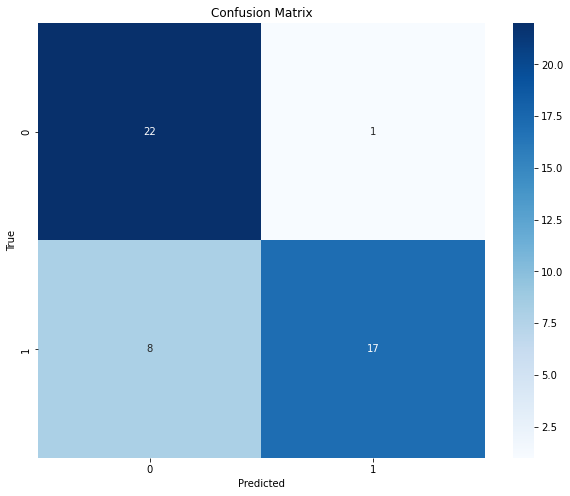

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(10, 8)) #buat figur dan heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# save model last model use = SVM

In [49]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer.pkl','wb'))

In [53]:
## load model
model = pickle.load(open('model.pkl','rb'))
tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl','rb'))

In [54]:
# Detective system

In [67]:
def detect(input_text):
    # convert vector
    vectorized_text = tfidf_vectorizer.transform([input_text])
    # akan diprediksi oleh model
    result = model.predict(vectorized_text)
    return "Unik" if result[0] == 1 else "Terdeteksi Plagiarism"

In [68]:
# example ( plagiat)
input_text = 'Researchers have discovered a new species of butterfly in the Amazon rainforest.'
detect(input_text)

'Terdeteksi Plagiarism'

In [69]:
# example (unik)
input_text = 'Luciano Williames Dias ( born July 25 , 1970 ) is a Brazilian football coach and former player .",Luciano Williames Dias ( born 25 July 1970 ) is a former football coach and Brazilian player'
detect(input_text)

'Unik'

In [81]:
# example (unik)
input_text = 'Lamas is the capital of the province of Lamas in the region of San MartÃ­n in northern Peru .,"Lamas is the capital of the San MartÃ­n region , located in the province of Lamas in northern Peru .'
detect(input_text)

'Terdeteksi Plagiarism'

In [80]:
# example ( unik)
input_text = 'Luciano Williames Dias ( born 25 July 1970 ) is a Brazilian football coach and former player .,"Luciano Williames Dias ( born July 25 , 1970 ) is a Brazilian football coach and former player .'
detect(input_text)

'Unik'

In [82]:
# sklearn version
import sklearn
sklearn.__version__

'1.0.2'